In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from matplotlib import pyplot as plt   
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

spark = (
    SparkSession.builder.appName("MAST30034 Project 2")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.driver.memory", "2g")
    .config("spark.executer.memory", "4g")
    .getOrCreate()
)

In [2]:
transaction_sdf = spark.read.parquet('../data/tables/transactions_*/*')\
        .withColumn(
            "order_datetime", 
            F.to_date(F.regexp_extract(F.split(F.input_file_name(), "=")[1], "(.*)/",1), "yyyy-MM-dd")
        )

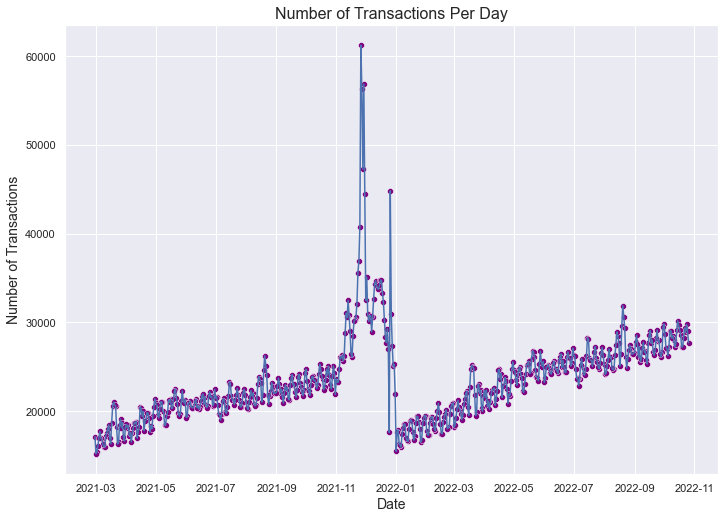

<Figure size 842.4x595.44 with 0 Axes>

In [3]:
# line plot of number of transactions each day
transaction_count_by_date = transaction_sdf.groupBy('order_datetime').count().toPandas()

sns.lineplot(x='order_datetime', y='count', data=transaction_count_by_date)
sns.scatterplot(x='order_datetime', y='count', data=transaction_count_by_date, color='purple')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.title('Number of Transactions Per Day', fontsize=16)
plt.show()
plt.savefig('../plots/Number of Transactions Each Day.png')

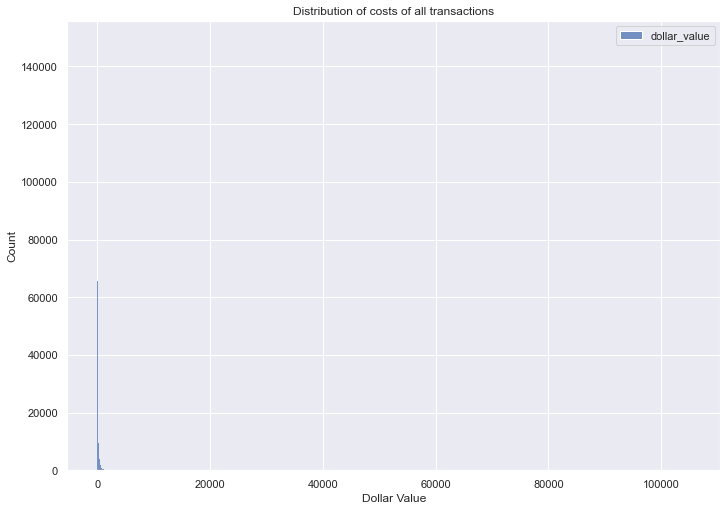

In [4]:
cost = transaction_sdf.select('dollar_value').toPandas()

fig = sns.histplot(cost)
fig.set_title("Distribution of costs of all transactions")
fig.set_xlabel('Dollar Value')
fig = fig.get_figure()
# fig.savefig('../plots/Distribution of log(costs) of all transactions.png')

In [5]:
log_sdf = transaction_sdf.withColumn('log(dollar)', F.log(F.col('dollar_value')))
log_cost = log_sdf.select('log(dollar)').toPandas()

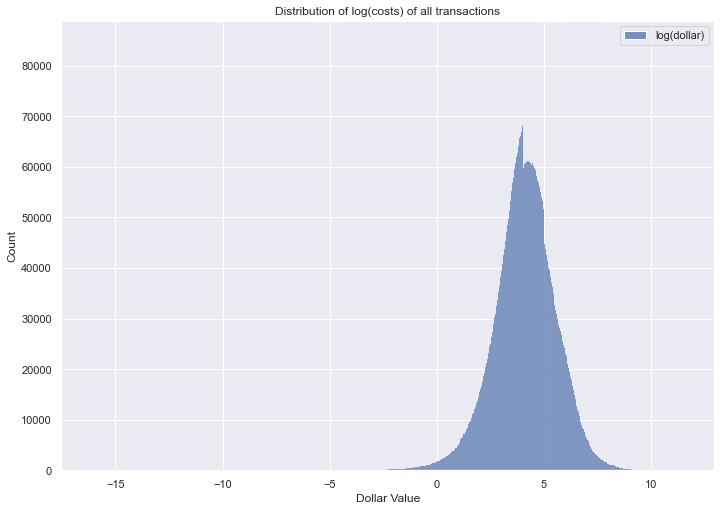

In [6]:
fig = sns.histplot(log_cost)
fig.set_title("Distribution of log(costs) of all transactions")
fig.set_xlabel('Dollar Value')
fig = fig.get_figure()
fig.savefig('../plots/Distribution of log(costs) of all transactions.png')